<a href="https://www.kaggle.com/code/adityaramachandran27/bundesliga-full-eda-data-visualization?scriptVersionId=131753303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bundesliga-seasons/bulidata.csv


![](https://www.bundesliga.com/assets/share/fallback-bundesliga-2022-2023.jpg)

<br>
<h1 style="font-size: 42px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;"><b> Bundesliga: </b>EDA + Data Visualization</h1>
<br>

## <font color='#8f52a4'>Table of contents<font><a class='anchor' id='top'></a>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">

1. [Summary of the dataset](#summary)
2. [Preliminary Analysis](#preliminary)
3. [Cleaning the Dataset ](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Univariate Analysis on Categorical Variables](#EDA_Cat)
6. [Bivariate Analysis ](#BVA)

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Summary of the Dataset</h1></span><a class='anchor' id='summary'></a>
<br>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
    
#### Dataset Intro
 
This Kaggle dataset provides comprehensive data on football (soccer) matches, including results, teams, and various statistics. The dataset covers matches from multiple leagues and seasons, allowing for in-depth analysis and insights into the world of football.

The dataset includes essential match information such as the date, league name, season, matchday number, and location where each match was played. This information enables researchers and enthusiasts to track matches chronologically and geographically.

#### Column Summary
    
- `match_date`: The date of the match.  
- `month`: The month in which the match took place.  
- `match_time`: The time of the match.  
- `season`: The season of the match.  
- `location`: The location where the match was held.  
- `matchday_nr`: The number of the matchday in the season.  
- `home_team_name`: The name of the home team.  
- `away_team_name`: The name of the away team.  
- `goals_home`: The number of goals scored by the home team.  
- `goals_away`: The number of goals scored by the away team.  
- `winner`: The winner of the match ('home team', 'away team', or 'draw').  
- `total_goals`: The total number of goals scored in the match.

<br>
<h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Reading the dataset</h1>
<br>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('/kaggle/input/bundesliga-seasons/bulidata.csv')
df.head()

,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,HOME_TEAM_ID,HOME_TEAM_NAME,HOME_TEAM,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,40,FC Bayern München,Bayern,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,65,1. FC Köln,Köln,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,107,MSV Duisburg,Duisburg,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,100,Hamburger SV,HSV,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,131,VfL Wolfsburg,Wolfsburg,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0


In [4]:
# Selecting the necessary columns
df.columns

Index(['Unnamed: 0', 'MATCH_DATE', 'LEAGUE_NAME', 'SEASON', 'LEAGUE', 'FINISHED', 'LOCATION', 'VIEWER', 'MATCHDAY', 'MATCHDAY_NR', 'HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_TEAM', 'HOME_ICON', 'AWAY_TEAM_ID', 'AWAY_TEAM_NAME', 'AWAY_TEAM', 'AWAY_ICON', 'GOALS_HOME', 'GOALS_AWAY', 'DRAW', 'WIN_HOME', 'WIN_AWAY'], dtype='object')

In [5]:
df = df[['MATCH_DATE', 'SEASON','LOCATION','MATCHDAY_NR','HOME_TEAM_NAME','AWAY_TEAM_NAME','GOALS_HOME', 'GOALS_AWAY', 'DRAW', 'WIN_HOME', 'WIN_AWAY']]

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Preliminary Analysis</h1></span><a class='anchor' id='preliminary'></a>
<br>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATCH_DATE      5508 non-null   object 
 1   SEASON          5508 non-null   int64  
 2   LOCATION        5508 non-null   object 
 3   MATCHDAY_NR     5508 non-null   int64  
 4   HOME_TEAM_NAME  5508 non-null   object 
 5   AWAY_TEAM_NAME  5508 non-null   object 
 6   GOALS_HOME      5508 non-null   int64  
 7   GOALS_AWAY      5508 non-null   int64  
 8   DRAW            5508 non-null   float64
 9   WIN_HOME        5508 non-null   float64
 10  WIN_AWAY        5508 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 473.5+ KB


In [7]:
df.describe()

,SEASON,MATCHDAY_NR,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
count,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000,5508.000000
mean,2013.500000,17.500000,1.394336,1.075527,0.290668,0.425744,0.283588
std,5.188598,9.811599,1.299628,1.131180,0.454112,0.494500,0.450780
min,2005.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.500000,17.500000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2018.000000,26.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,2022.000000,34.000000,9.000000,8.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

MATCH_DATE        0
SEASON            0
LOCATION          0
MATCHDAY_NR       0
HOME_TEAM_NAME    0
AWAY_TEAM_NAME    0
GOALS_HOME        0
GOALS_AWAY        0
DRAW              0
WIN_HOME          0
WIN_AWAY          0
dtype: int64

In [9]:
df.duplicated().sum()

0

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Conclusions 🔍</font></h3>
    
- No null values
- No missing values
- No duplicated rows 
- It is possible to combine the `DRAW`, `WIN_HOME`, and `WIN_AWAY` columns into a single column named `Match Results`.
- Need to convert the column header to lower case for better readability
- Need to convert date column to proper datetime

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Cleaning the Dataset</h1></span><a class='anchor' id='cleaning'></a>
<br>

In [10]:
#Merging the last 3 column values into one single column 

df['match_result'] = df[['DRAW', 'WIN_HOME', 'WIN_AWAY']].idxmax(axis=1)
df = df.drop(['DRAW', 'WIN_HOME', 'WIN_AWAY'], axis=1)

# Converting column names into lower case
df.columns = df.columns.str.lower()

# Converting date column to datetime 
df['match_date'] = pd.to_datetime(df['match_date'])

# Creating a month column from the match_date column 
df['month'] = df['match_date'].dt.month_name()


# Seperating the time from the match_date column 
df['match_time'] = df['match_date'].dt.time
df['match_date'] = df['match_date'].dt.date


# Rearranging columns 
df = df[['match_date', 'month', 'match_time', 'season', 'location',	'matchday_nr',	'home_team_name',	'away_team_name',	'goals_home',	'goals_away',	'match_result']]


# Changing the values in the 'match_result' column to a much cleaner format
def change_match_result_wording(series):
    if series == 'WIN_HOME':
        return 'home team'
    elif series == 'WIN_AWAY':
        return 'away team'
    else:
        return 'draw'

df['winner'] = df['match_result'].apply(change_match_result_wording)
df.drop(columns='match_result', inplace=True)


df['total_goals'] = df['goals_home'] + df['goals_away']
df.head()

,match_date,month,match_time,season,location,matchday_nr,home_team_name,away_team_name,goals_home,goals_away,winner,total_goals
0,2005-08-05,August,20:30:00,2005,München,1,FC Bayern München,Borussia Mönchengladbach,3,0,home team,3
1,2005-08-06,August,15:30:00,2005,Köln,1,1. FC Köln,1. FSV Mainz 05,1,0,home team,1
2,2005-08-06,August,15:30:00,2005,Duisburg,1,MSV Duisburg,VfB Stuttgart,1,1,draw,2
3,2005-08-06,August,15:30:00,2005,Hamburg,1,Hamburger SV,1. FC Nürnberg,3,0,home team,3
4,2005-08-06,August,15:30:00,2005,Wolfsburg,1,VfL Wolfsburg,Borussia Dortmund,2,2,draw,4


# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Exploratory Data Analysis </h1></span><a class='anchor' id='EDA'></a>
<br>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">

- Univariate analysis focuses on analyzing each feature in the dataset independently.
- Distribution analysis:
    - The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
- Identifying potential issues:
    - Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Segregating Columns into groups</h2>
<br>

<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">

- **Numerical** - `goals_home`, `goals_away`, `total_goals`
- **Categorical** - `month`, `match_time`, `season`, `location`, `matchday_nr`, `home_team_name`, `away_team_name`, `winner`

### 

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on home goals</h2>
<br>

In [11]:
df['goals_home'].describe()

count    5508.000000
mean        1.394336
std         1.299628
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: goals_home, dtype: float64

In [12]:
sns.set_palette = 'deep'
sns.set_style("darkgrid")

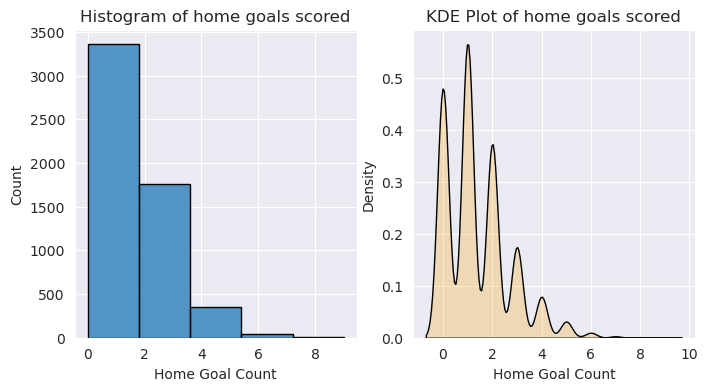

In [13]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0] = sns.histplot(data=df, x='goals_home', ax=ax[0], bins=5, edgecolor='black')
ax[0].set(title='Histogram of home goals scored', xlabel='Home Goal Count')

ax[1] = sns.kdeplot(data=df, x='goals_home', ax=ax[1], fill=True, color='orange',edgecolor='black')
ax[1].set(title='KDE Plot of home goals scored', xlabel='Home Goal Count')
plt.show()

In [14]:
df['goals_home'].skew()

1.107116741335191

In [15]:
print('Goals scored by the Home Team: ')
print('-------------------------------')
for i in range(0,10):
    print('between {} and {} '.format(i, i+1), '->', 
          round(len(df.query("goals_home > {} and goals_home <= 2{}".format(i, i+1))) / len(df['goals_home']) * 100, 3), '%')

Goals scored by the Home Team: 
-------------------------------
between 0 and 1  -> 72.059 %
between 1 and 2  -> 39.07 %
between 2 and 3  -> 17.357 %
between 3 and 4  -> 7.208 %
between 4 and 5  -> 2.614 %
between 5 and 6  -> 0.799 %
between 6 and 7  -> 0.236 %
between 7 and 8  -> 0.073 %
between 8 and 9  -> 0.018 %
between 9 and 10  -> 0.0 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>

- No missing values/ null values
- Data is positvely skewed 
- The majority of goals (71%) scored by the home team in a match fall within the range of 0 to 1.
- The goals scored percentage decreases drastically after 5
    


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on away goals</h2>
<br>

In [16]:
df['goals_away'].describe()

count    5508.000000
mean        1.075527
std         1.131180
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: goals_away, dtype: float64

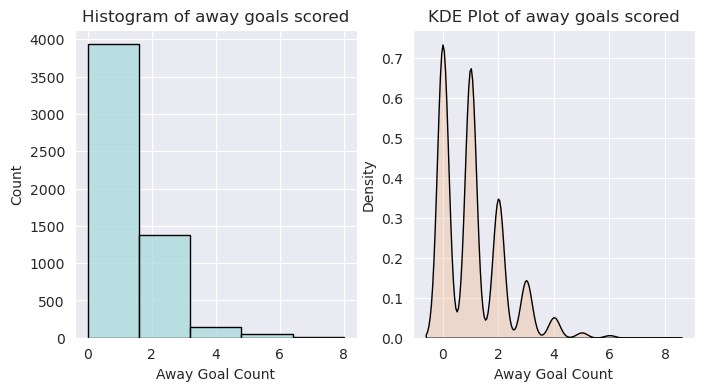

In [17]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0] = sns.histplot(data=df, x='goals_away', ax=ax[0], bins=5, color='#a8dadc', edgecolor='black')
ax[0].set(title='Histogram of away goals scored', xlabel='Away Goal Count')

ax[1] = sns.kdeplot(data=df, x='goals_away', ax=ax[1], fill=True, color= '#f4a261',edgecolor='black')
ax[1].set(title='KDE Plot of away goals scored', xlabel='Away Goal Count')
plt.show()

In [18]:
print('Goals scored by the Away Team: ')
print('-------------------------------')
for i in range(0,10):
    print('between {} and {} '.format(i, i+1), '->', 
          round(len(df.query("goals_away > {} and goals_home <= 2{}".format(i, i+1))) / len(df['goals_home']) * 100, 3), '%')

Goals scored by the Away Team: 
-------------------------------
between 0 and 1  -> 62.836 %
between 1 and 2  -> 28.613 %
between 2 and 3  -> 10.948 %
between 3 and 4  -> 3.649 %
between 4 and 5  -> 1.053 %
between 5 and 6  -> 0.381 %
between 6 and 7  -> 0.054 %
between 7 and 8  -> 0.018 %
between 8 and 9  -> 0.0 %
between 9 and 10  -> 0.0 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- no missing values
- data is positively skewed
- The away team has significantly lesser goal score percentage
- **This shows us that the teams score less goals when playing away than playing at home**

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on total goals</h2>
<br>

In [19]:
df['total_goals'].describe()

count    5508.000000
mean        2.469862
std         1.731789
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: total_goals, dtype: float64

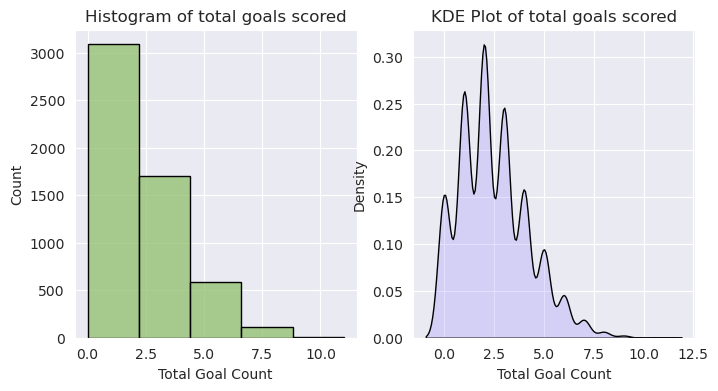

In [20]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0] = sns.histplot(data=df, x='total_goals', ax=ax[0], bins=5, color='#90be6d', edgecolor='black')
ax[0].set(title='Histogram of total goals scored', xlabel='Total Goal Count')

ax[1] = sns.kdeplot(data=df, x='total_goals', ax=ax[1], fill=True, color= '#9381ff', edgecolor='black')
ax[1].set(title='KDE Plot of total goals scored', xlabel='Total Goal Count')
plt.show()

In [21]:
df['total_goals'].skew()

0.7046743102770833

In [22]:
print('Total goals scored in a match: ')
print('-------------------------------')
print('No goal scored'.format(i, i+1), '  ->', 
          round(len(df.query("total_goals == 0".format(i, i+1))) / len(df['goals_home']) * 100, 3), '%')

for i in range(0,11):
    print('between {} and {} '.format(i, i+1), '->', 
          round(len(df.query("total_goals > {} and goals_home <= 2{}".format(i, i+1))) / len(df['goals_home']) * 100, 3), '%')

Total goals scored in a match: 
-------------------------------
No goal scored   -> 11.765 %
between 0 and 1  -> 88.235 %
between 1 and 2  -> 68.028 %
between 2 and 3  -> 43.918 %
between 3 and 4  -> 25.054 %
between 4 and 5  -> 12.908 %
between 5 and 6  -> 5.664 %
between 6 and 7  -> 2.179 %
between 7 and 8  -> 0.708 %
between 8 and 9  -> 0.218 %
between 9 and 10  -> 0.036 %
between 10 and 11  -> 0.036 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- No missing values
- Data is somewhat skewed to the right (a lot lesser than home goals and away goals column)
- In about 12% of the matches no goals were scored (no-score draw)
- There is a very less probability that more than 7 total goals will be scored in a match

<span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Univariate Analysis on Categorical Variables</h1></span><a class='anchor' id='EDA_Cat'></a>
<br>

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on month</h2>
<br>

In [23]:
df['month'].value_counts().reset_index()


,index,month
0,April,683
1,February,669
2,March,596
3,September,592
4,October,583
5,November,577
6,December,525
7,May,473
8,August,413
9,January,350


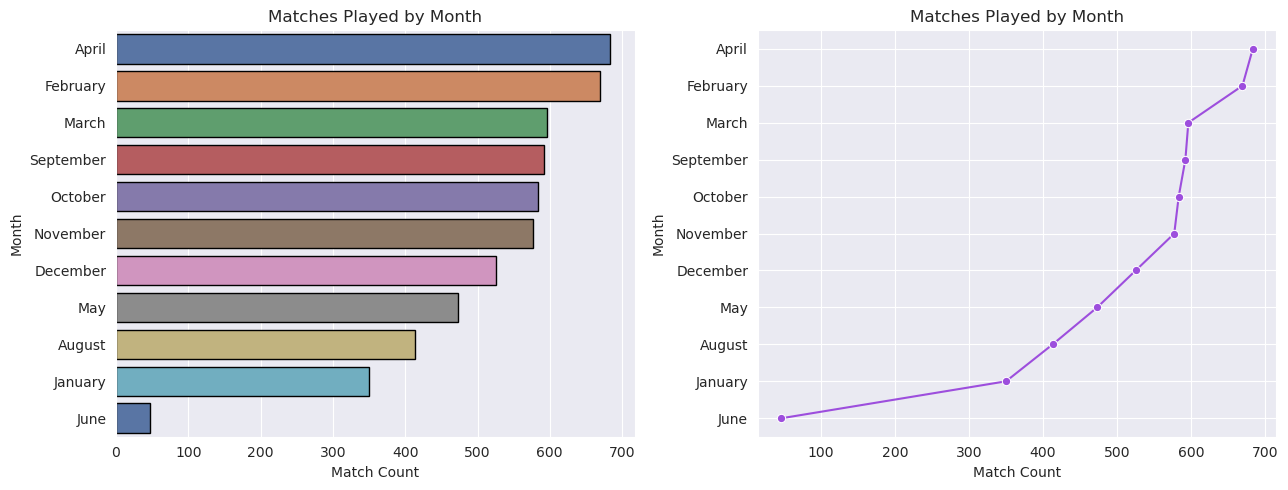

In [24]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
ax[0] = sns.barplot(data=df, y=df['month'].value_counts().reset_index()['index'], 
                    x=df['month'].value_counts().reset_index()['month'], ax=ax[0], linewidth=1, edgecolor='black', palette='deep')
ax[0].set(title='Matches Played by Month',ylabel='Month', xlabel='Match Count')

ax[1] = sns.lineplot(data=df, y=df['month'].value_counts().reset_index()['index'], 
                    x=df['month'].value_counts().reset_index()['month'], ax=ax[1], marker='o', color='#9d4edd')
ax[1].set(ylabel='Month', xlabel='Match Count')
# plt.xticks(rotation=30)

plt.title('Matches Played by Month')
plt.tight_layout()
plt.show()

In [25]:
months_list = []
value = []
for month in df['month'].unique():
    percentage = len(df.query('month == "{}"'.format(month))) / len(df['month']) * 100
    months_list.append(month)
    value.append(percentage)
    df1 = pd.DataFrame({'Month':months_list, 'Percentage':value})

df1.set_index('Month').sort_values(by='Percentage',ascending=False).T.style.background_gradient(axis=None, cmap='viridis_r')  

Month,April,February,March,September,October,November,December,May,August,January,June
Percentage,12.400145,12.145969,10.820625,10.748003,10.584604,10.475672,9.531590,8.587509,7.498184,6.354394,0.853304


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- Most of the matches are played in April and February 
- No matches are played in July 

### 
<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on year</h2>
<br>

In [26]:
df['season'].value_counts().reset_index().set_index('index').T

index,2005,2006,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2022
season,306,306,306,306,306,306,306,306,306,306,306,306,306,306,306,306,306,306


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- Equal Number of matches are played every year


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on location</h2>
<br>

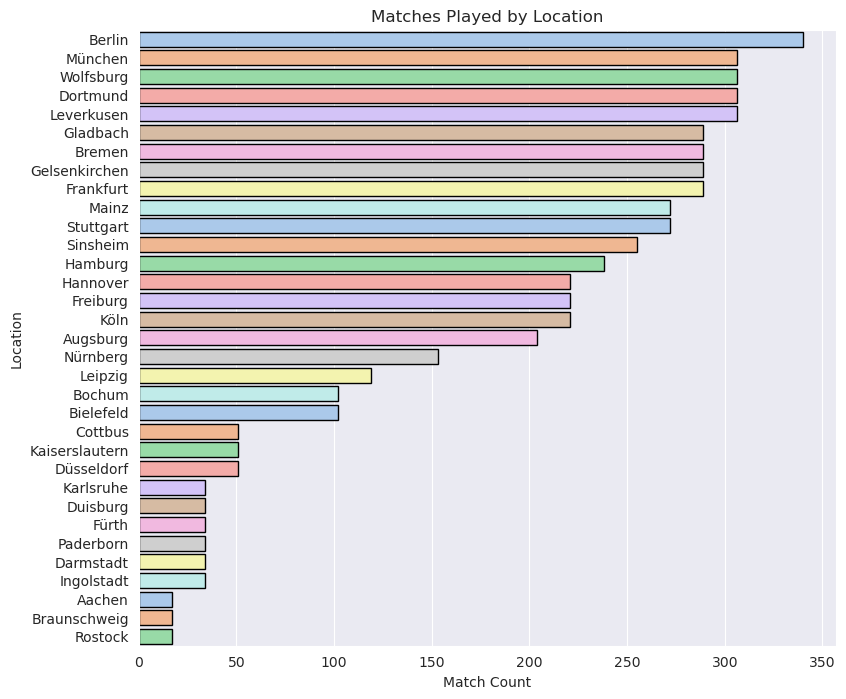

In [27]:
fig, ax = plt.subplots(figsize=(9,8))
ax = sns.barplot(data=df, y=df['location'].value_counts().reset_index()['index'], 
                x=df['location'].value_counts().reset_index()['location'], ax=ax, 
                linewidth=1, edgecolor='black', palette='pastel')

ax.set(title='Matches Played by Location',ylabel='Location', xlabel='Match Count')

plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- Most of the matches are played in German cities
- This comes as no surprise because Bundesliga is a German Football League and these cities are "home" to various German football clubs


<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on home team name and away team name</h2>
<br>

<div style="border-radius:10px; border:#a7c957 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🤔 Observations:</font></h3>
 
    
```python 
    total_list = []
    team_list = []
    for team in df['away_team_name'].unique():
        total = df['away_team_name'].str.contains(team).sum() + df['home_team_name'].str.contains(team).sum()
        team_list.append(team)
        total_list.append(total)

    [True for x in total_list if x%2 == 0]
```
- Used the above script to notice that equal number of matches are played at home and away from home 
- So we can analyze one column and double the number to get the total matches played by a team 

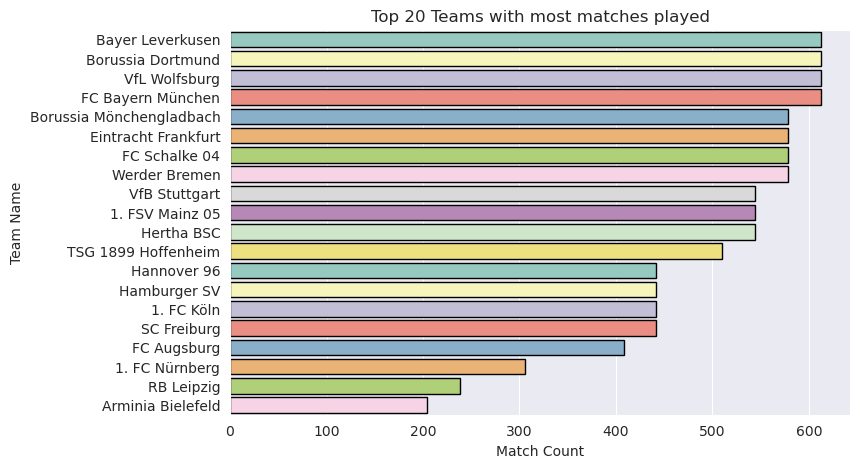

In [28]:
(df['away_team_name'].value_counts()*2).reset_index()


fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(data=df, y=(df['away_team_name'].value_counts()*2).reset_index().head(20)['index'], 
                x=(df['away_team_name'].value_counts()*2).reset_index().head(20)['away_team_name'], ax=ax, 
                linewidth=1, edgecolor='black', palette='Set3')

ax.set(title='Top 20 Teams with most matches played',ylabel='Team Name', xlabel='Match Count')

plt.show()

### 
<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis of winner</h2>
<br>

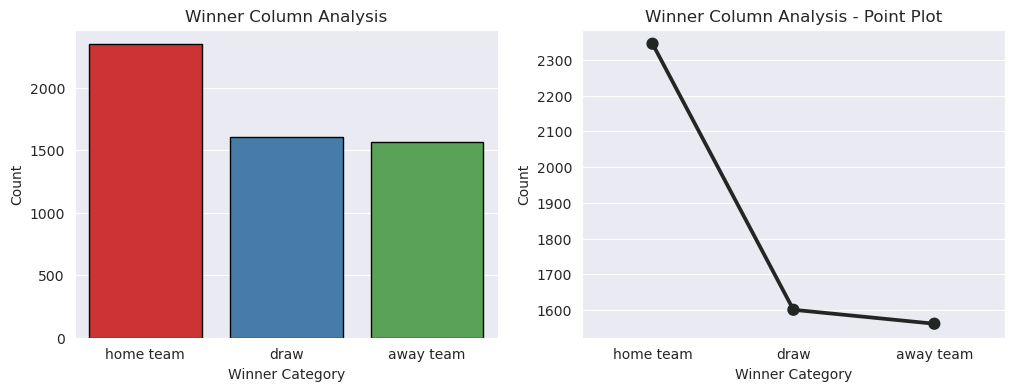

In [29]:
df['winner'].value_counts().reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0] = sns.barplot(data=df, y=df['winner'].value_counts().reset_index()['winner'], 
                x=df['winner'].value_counts().reset_index()['index'], ax=ax[0], 
                linewidth=1, edgecolor='black', palette='Set1')

ax[1] = sns.pointplot(data=df, y=df['winner'].value_counts().reset_index()['winner'], 
                x=df['winner'].value_counts().reset_index()['index'], ax=ax[1], color='#222725')

ax[0].set(title='Winner Column Analysis',ylabel='Count', xlabel='Winner Category')
ax[1].set(title='Winner Column Analysis - Point Plot',ylabel='Count', xlabel='Winner Category')

plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
 
- The home team has a clear advantage of winning the match
- This can be attributed to a number of factors, such as familiarity with the field and the support of the home crowd.

# <span><h1 style="font-size: 36px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #e9f7ef; color: #8f52a4; text-align: center; border-radius: 150px 150px;">Bivariate Analysis </h1></span><a class='anchor' id='BVA'></a>
<br>
<div style="border-radius:10px; border:#e7c6ff solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
    
Bivariate analysis is the examination of the relationship between two variables. Here are three key points about bivariate analysis:
- Relationship Exploration: Bivariate analysis helps uncover patterns, associations, or connections between two variables. It allows us to understand how changes in one variable correspond to changes in another variable.

- Correlation Assessment: Bivariate analysis helps us assess the strength and direction of the relationship between two variables. It enables us to determine if the variables are positively, negatively, or not correlated at all.

- Visual Representation: Bivariate analysis often involves the use of visualizations such as scatter plots, line graphs, or heatmaps. These visual representations provide a clear and concise way to understand the relationship between the two variabl

<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysing winner and season</h2>
<br>

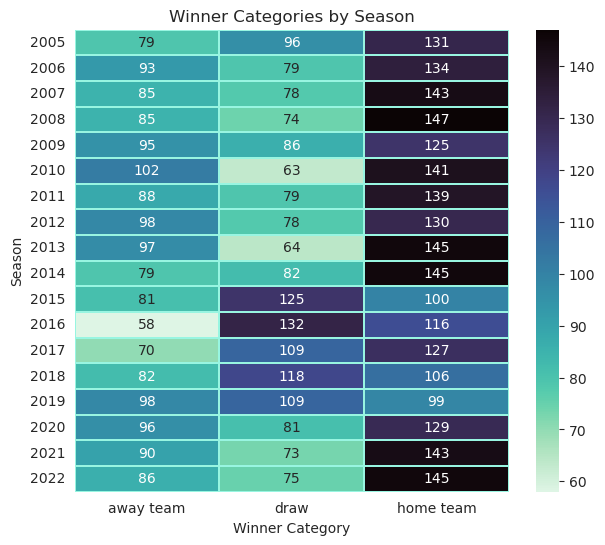

In [30]:
pd.crosstab(index=df['season'], columns=df['winner'])
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(pd.crosstab(index=df['season'], columns=df['winner']), ax=ax, annot=True, fmt='.0f',  cmap='mako_r', 
                linewidths=0.005,linecolor='#98f5e1')
ax.set(title='Winner Categories by Season', xlabel='Winner Category', ylabel='Season')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- Most of the matches are won by the home team
- The away team has **never** won more matches than the home team in a season
- This shows that the home support is crucial and very much a real thing
- 2015 - 2019, significant number of matches ended in a draw

### 
<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on location and total goals</h2>
<br>

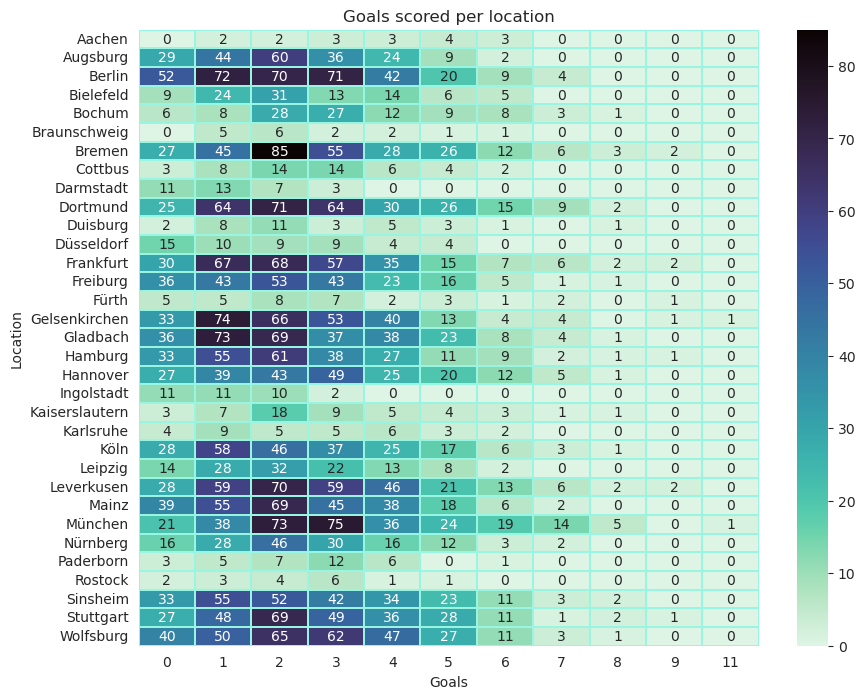

In [31]:
pd.crosstab(index=df['location'], columns=df['total_goals'], margins=True)
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(pd.crosstab(index=df['location'], columns=df['total_goals']),annot=True,fmt='.0f', cmap='mako_r', ax=ax, 
                 linewidths=0.005,linecolor='#98f5e1')
ax.set(title='Goals scored per location', ylabel='Location', xlabel='Goals')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>

- Goals scored depends a lot on the location 
- This may be becuase more matches are played at certain location
- If we scroll to the `Matches played by location EDA`, we can see that the locations where more goals are scored, host more matches too

### 
<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on season and away goals, home goals</h2>
<br>

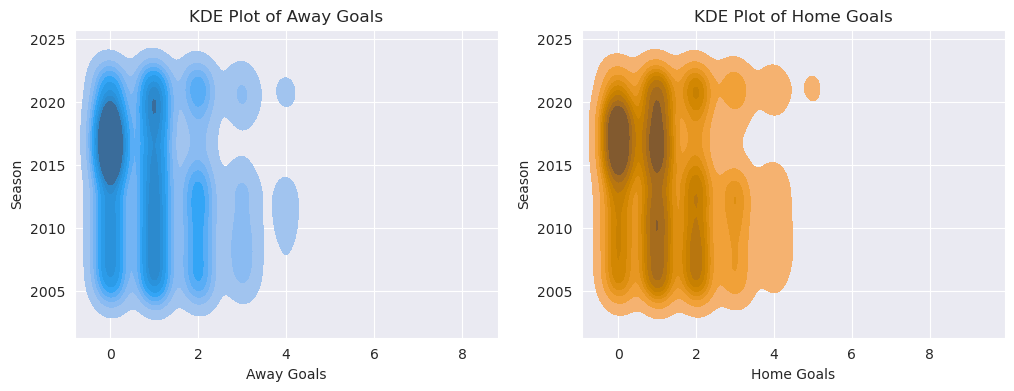

In [32]:
fig,ax = plt.subplots(1,2, figsize=(12,4))

ax[0] = sns.kdeplot(data=df, y='season', x='goals_away', fill=True, ax = ax[0])
ax[0].set(title='KDE Plot of Away Goals', xlabel='Away Goals', ylabel='Season')
ax[1] = sns.kdeplot(data=df, y='season', x='goals_home', fill=True, ax = ax[1], color='orange')
ax[1].set(title='KDE Plot of Home Goals', xlabel='Home Goals', ylabel='Season')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- The goals scored when playing at home is more as compared to when playing away 
- This is shown by the closeness of the contour lines in both the 2D KDE Plots
- This again proves, home games are very much important and home support also playes a vital role in the teams performance 

### 
<br>
<h2 style="font-size: 28px; font-family: 'Roboto Mono', monospace; font-weight: normal; background-color: #c7f9cc; color: #ef476f; text-align: center; border-radius: 150px 150px;">Analysis on season and total goals</h2>
<br>

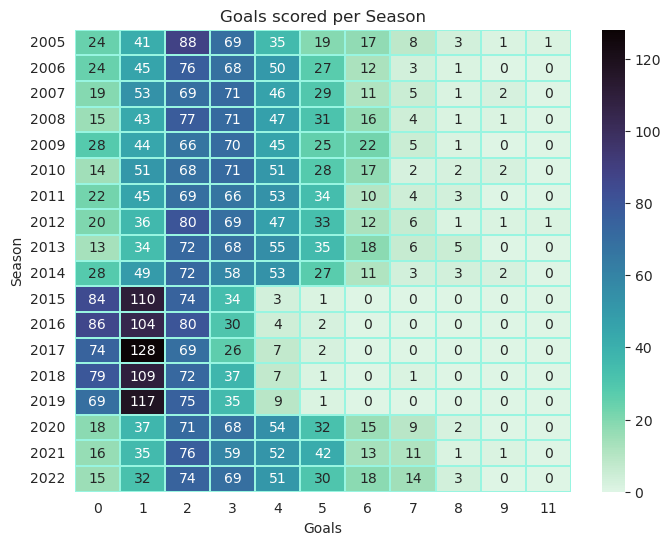

In [33]:
pd.crosstab(index=df['season'], columns=df['total_goals'])
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(pd.crosstab(index=df['season'], columns=df['total_goals']),annot=True,fmt='.0f', cmap='mako_r', ax=ax, 
                 linewidths=0.005,linecolor='#98f5e1')
ax.set(title='Goals scored per Season', ylabel='Season', xlabel='Goals')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>🔍 Conclusions:</font></h3>
    
- We can see a that a lot of matches ended with no goals scored bwteen 2015 - 2019. 
- Now, if you take a look at the winner category vs season EDA, you can see that a lot of matches ended in a draw in this same period. So, that tells us that a lot of matches ended in a no-score draw
- In this same period, hardly any matche had a total goal score of more than 3, competition was very fierce
- Weirdly enough, this stopped after 2019 and it is back to being 'normal' in recent years


<div style="border-radius:10px; border:#2ec4b6 solid; padding: 15px; background-color: #f6f5f5; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>End of EDA</font></h3>
    Thank you so much for goinf through my notebook! If you have any suggestions, please feel free to put them in the comments